In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install -U scikit-learn scipy matplotlib

In [ ]:
#上課程式碼
from sklearn import datasets

# check what's inside the data
data = datasets.load_boston()
print(data.feature_names)
print(data.DESCR)

# import only the data and target for building the multiple regression model
data = datasets.load_boston().data
target = datasets.load_boston().target
print(data[0], target[0])

# split the input data into training and testing sets
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2)
print(data_train.shape)
print(data_test.shape)
print(target_train.shape)
print(target_test.shape)

# build and train the multiple regression model
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(data_train, target_train)
predictions = reg_model.predict(data_test)
print(predictions.round(1))
print(target_test)

# evaluate using scatter plot
import matplotlib.pyplot as plt
plt.scatter(target_test, predictions)
plt.show()

# evaluate using coefficient of determination, R2
print(reg_model.score(data_train, target_train).round(3))
print(reg_model.score(data_test, target_test).round(3))

import numpy as np
print(np.corrcoef(target_test, predictions))

# evaluate using residual plot
x = np.arange(predictions.size)
y = x * 0
plt.scatter(x, predictions-target_test)
plt.plot(x, y, color='orange')
plt.show()

# evaluate using mean absolute error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test, predictions).round(3))

# get the model coefficients and intercept
print(reg_model.coef_.round(3))
print(reg_model.intercept_.round(3))

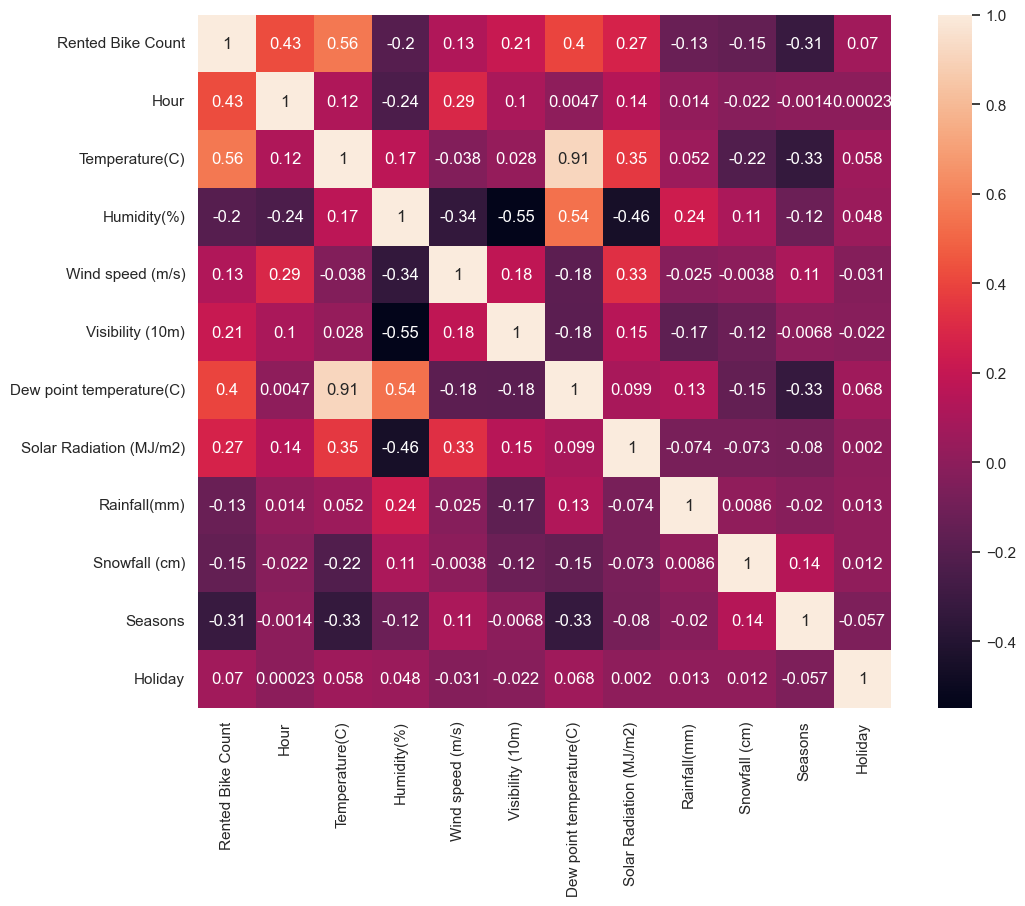

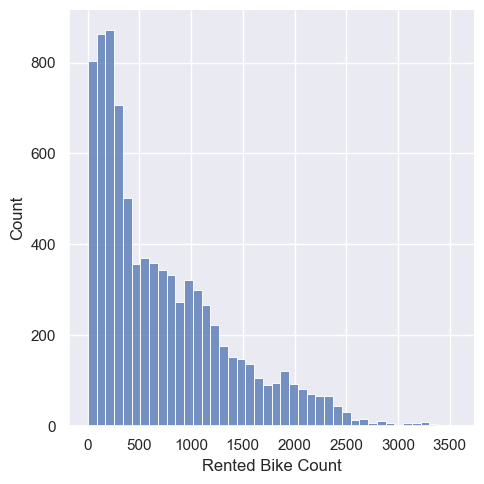

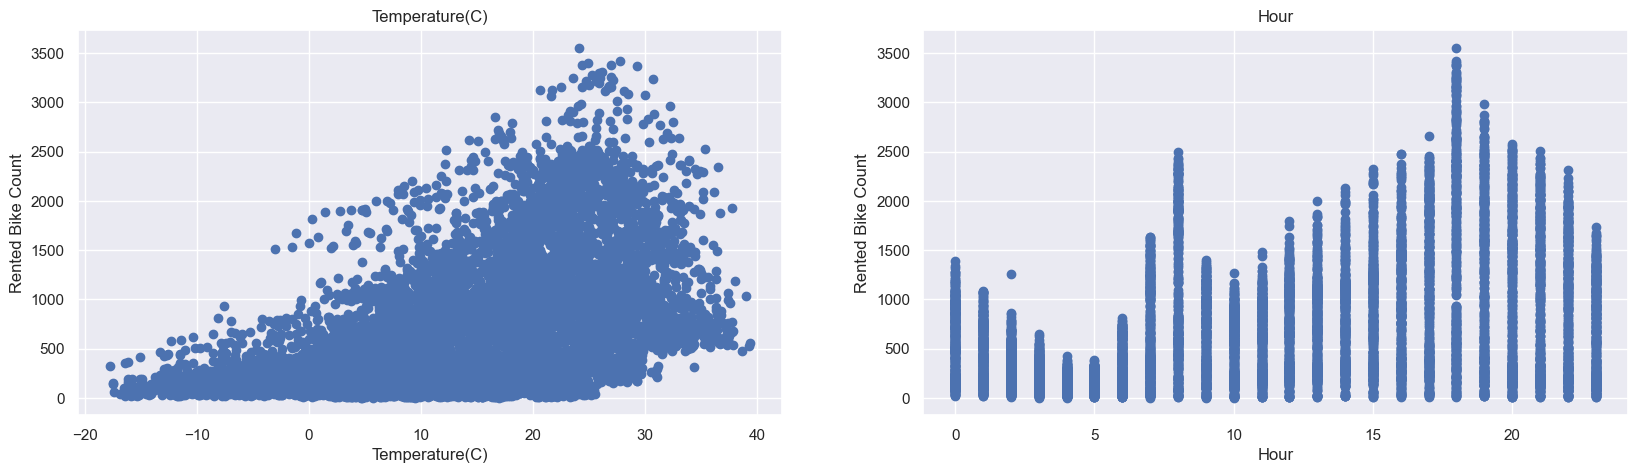

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
df = sns.load_dataset("penguins")

data = pd.read_csv ('SeoulBikeData.csv', encoding='gbk', index_col=['Date'])
data = data.rename(columns={'Temperature(癈)':'Temperature(C)', 'Dew point temperature(癈)':'Dew point temperature(C)'})

data = data[data['Functioning Day'] == 'Yes']
data.pop('Functioning Day')


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Seasons'] = le.fit_transform(data['Seasons'])
data['Holiday'] = le.fit_transform(data['Holiday'])

#print(data.describe())
#print (data.keys())
#print(data.head())

#確認是否有缺失值
#print(data.isnull().sum())

#correlation matrix
corrmat = data.iloc[0:,0:12].corr()
#print (corrmat)

f, ax = plt.subplots(figsize = (12, 9))
# annot = True 讓我們可以把數字標進每個格子裡
fig = sns.heatmap(corrmat, vmax = 1, annot = True, square = True )

# 用seaborn一次把圖表的美化格式設定好，這裡是只有先設定圖表長寬
sns.set(rc={'figure.figsize':(10,10)})
# 使用的資料是腳踏車租借次數 Rented Bike Count 
sns.displot(data['Rented Bike Count'])
plt.show()

# 設定整張圖的長寬
plt.figure(figsize=(20, 5))
features = ['Temperature(C)', 'Hour']
target = data['Rented Bike Count']

for i, col in enumerate(features):
 # 排版1 row, 2 columns, nth plot：在jupyter notebook上兩張並排 
 plt.subplot(1, len(features) , i+1)
 # add data column into plot
 x = data[col]
 y = target
 plt.scatter(x, y, marker='o')
 plt.title(col)
 plt.xlabel(col)
 plt.ylabel('Rented Bike Count')

